In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/dcgm.csv')

In [3]:
df.head()

,Node,avgmemoryutilization_pct,avgsmutilization_pct,energyconsumed_joules,gpu_id,maxgpumemoryused_bytes,memoryutilization_pct_avg,memoryutilization_pct_max,memoryutilization_pct_min,pcierxbandwidth_megabytes_avg,...,pcietxbandwidth_megabytes_max,pcietxbandwidth_megabytes_min,powerusage_watts_avg,powerusage_watts_max,powerusage_watts_min,smutilization_pct_avg,smutilization_pct_max,smutilization_pct_min,totalexecutiontime_sec,id_job
0,r9170217-n750018,0.0,1.0,157521.0,0,2.645557e+09,3.0,24.0,0.0,1646.0,...,1530.0,676.0,44.0546,156.962,25.468,11.0,64.0,0.0,4452.47,4393785332
1,r44132-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.000,0.000,0.0,0.0,0.0,0.54,18177101425
2,r5354770-n172107,0.0,3.0,94816.0,0,2.917171e+07,0.0,0.0,0.0,1846.0,...,1872.0,1346.0,26.3725,27.483,25.979,6.0,43.0,0.0,8398.30,39529488078
3,r1900814-n772143,0.0,0.0,69451.0,0,1.527587e+09,0.0,1.0,0.0,539.0,...,337.0,293.0,37.5481,52.039,26.676,1.0,25.0,0.0,1851.72,19994333952
4,r9515777-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,1991.0,...,1109.0,1109.0,25.0320,25.032,25.032,0.0,0.0,0.0,0.99,397881706


In [4]:
df.shape

(96893, 23)

In [5]:
df.isna().sum()

Node                             0
avgmemoryutilization_pct         0
avgsmutilization_pct             0
energyconsumed_joules            0
gpu_id                           0
maxgpumemoryused_bytes           0
memoryutilization_pct_avg        0
memoryutilization_pct_max        0
memoryutilization_pct_min        0
pcierxbandwidth_megabytes_avg    0
pcierxbandwidth_megabytes_max    0
pcierxbandwidth_megabytes_min    0
pcietxbandwidth_megabytes_avg    0
pcietxbandwidth_megabytes_max    0
pcietxbandwidth_megabytes_min    0
powerusage_watts_avg             0
powerusage_watts_max             0
powerusage_watts_min             0
smutilization_pct_avg            0
smutilization_pct_max            0
smutilization_pct_min            0
totalexecutiontime_sec           0
id_job                           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96893 entries, 0 to 96892
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Node                           96893 non-null  object 
 1   avgmemoryutilization_pct       96893 non-null  float64
 2   avgsmutilization_pct           96893 non-null  float64
 3   energyconsumed_joules          96893 non-null  float64
 4   gpu_id                         96893 non-null  int64  
 5   maxgpumemoryused_bytes         96893 non-null  float64
 6   memoryutilization_pct_avg      96893 non-null  float64
 7   memoryutilization_pct_max      96893 non-null  float64
 8   memoryutilization_pct_min      96893 non-null  float64
 9   pcierxbandwidth_megabytes_avg  96893 non-null  float64
 10  pcierxbandwidth_megabytes_max  96893 non-null  float64
 11  pcierxbandwidth_megabytes_min  96893 non-null  float64
 12  pcietxbandwidth_megabytes_avg  96893 non-null 

In [8]:
df.nunique()

Node                               225
avgmemoryutilization_pct            85
avgsmutilization_pct               100
energyconsumed_joules            51449
gpu_id                               2
maxgpumemoryused_bytes            8390
memoryutilization_pct_avg           88
memoryutilization_pct_max          101
memoryutilization_pct_min           61
pcierxbandwidth_megabytes_avg     2148
pcierxbandwidth_megabytes_max     2148
pcierxbandwidth_megabytes_min     2148
pcietxbandwidth_megabytes_avg     2148
pcietxbandwidth_megabytes_max     2148
pcietxbandwidth_megabytes_min     2148
powerusage_watts_avg             79657
powerusage_watts_max             58583
powerusage_watts_min             24269
smutilization_pct_avg              101
smutilization_pct_max              101
smutilization_pct_min               84
totalexecutiontime_sec           44872
id_job                           74849
dtype: int64

In [9]:
df.describe()

,avgmemoryutilization_pct,avgsmutilization_pct,energyconsumed_joules,gpu_id,maxgpumemoryused_bytes,memoryutilization_pct_avg,memoryutilization_pct_max,memoryutilization_pct_min,pcierxbandwidth_megabytes_avg,pcierxbandwidth_megabytes_max,...,pcietxbandwidth_megabytes_max,pcietxbandwidth_megabytes_min,powerusage_watts_avg,powerusage_watts_max,powerusage_watts_min,smutilization_pct_avg,smutilization_pct_max,smutilization_pct_min,totalexecutiontime_sec,id_job
count,96893.000000,96893.000000,96893.000000,96893.000000,9.689300e+04,96893.000000,96893.000000,96893.000000,96893.000000,96893.000000,...,96893.000000,96893.000000,96893.000000,96893.000000,96893.000000,96893.000000,96893.000000,96893.000000,9.689300e+04,9.689300e+04
mean,7.420206,21.231998,98732.099491,0.454140,7.169812e+09,8.819409,21.771820,0.098397,922.292240,1102.159712,...,957.035235,792.028155,66.949795,115.754833,31.547750,24.862436,50.476711,0.400968,2.206985e+04,3.344690e+10
std,12.625314,28.437426,168706.020958,0.497895,1.048171e+10,13.520285,25.421592,2.529322,609.972447,738.590877,...,714.644379,669.515853,50.563993,92.750007,9.853968,29.566378,43.824541,5.895888,9.998470e+04,1.943712e+10
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e-02,1.055011e+06
25%,0.000000,0.000000,1828.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,369.000000,393.000000,...,266.000000,102.000000,27.051000,27.503000,25.574000,0.000000,0.000000,0.000000,1.562000e+01,1.645700e+10
50%,0.000000,3.000000,10234.000000,0.000000,2.106589e+09,1.000000,10.000000,0.000000,948.000000,1092.000000,...,884.000000,708.000000,42.285500,66.502000,27.065000,12.000000,51.000000,0.000000,2.010400e+02,3.381671e+10
75%,15.000000,46.000000,133714.000000,1.000000,7.762608e+09,17.000000,43.000000,0.000000,1393.000000,1809.000000,...,1583.000000,1357.000000,109.944000,222.825000,37.495000,48.000000,100.000000,0.000000,5.596680e+03,5.009353e+10
max,85.000000,99.000000,868934.000000,1.000000,3.408396e+10,89.000000,100.000000,86.000000,2147.000000,2147.000000,...,2147.000000,2147.000000,242.436000,337.630000,146.989000,100.000000,100.000000,100.000000,2.895390e+06,6.710872e+10


In [10]:
df.head()

,Node,avgmemoryutilization_pct,avgsmutilization_pct,energyconsumed_joules,gpu_id,maxgpumemoryused_bytes,memoryutilization_pct_avg,memoryutilization_pct_max,memoryutilization_pct_min,pcierxbandwidth_megabytes_avg,...,pcietxbandwidth_megabytes_max,pcietxbandwidth_megabytes_min,powerusage_watts_avg,powerusage_watts_max,powerusage_watts_min,smutilization_pct_avg,smutilization_pct_max,smutilization_pct_min,totalexecutiontime_sec,id_job
0,r9170217-n750018,0.0,1.0,157521.0,0,2.645557e+09,3.0,24.0,0.0,1646.0,...,1530.0,676.0,44.0546,156.962,25.468,11.0,64.0,0.0,4452.47,4393785332
1,r44132-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.000,0.000,0.0,0.0,0.0,0.54,18177101425
2,r5354770-n172107,0.0,3.0,94816.0,0,2.917171e+07,0.0,0.0,0.0,1846.0,...,1872.0,1346.0,26.3725,27.483,25.979,6.0,43.0,0.0,8398.30,39529488078
3,r1900814-n772143,0.0,0.0,69451.0,0,1.527587e+09,0.0,1.0,0.0,539.0,...,337.0,293.0,37.5481,52.039,26.676,1.0,25.0,0.0,1851.72,19994333952
4,r9515777-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,1991.0,...,1109.0,1109.0,25.0320,25.032,25.032,0.0,0.0,0.0,0.99,397881706


In [11]:
print("Categories in 'Node' variable:     ",end=" " )
print(df['Node'].unique())


Categories in 'Node' variable:      ['r9170217-n750018' 'r44132-n469339' 'r5354770-n172107' 'r1900814-n772143'
 'r9515777-n469339' 'r8532701-n750018' 'r7317916-n303509'
 'r8972851-n948219' 'r6959555-n172107' 'r9515777-n303766'
 'r7269000-n303509' 'r8473362-n303766' 'r5198790-n172107'
 'r4099734-n750018' 'r7141590-n948219' 'r8275852-n410412'
 'r4144777-n303509' 'r3974592-n772143' 'r6727430-n750018'
 'r1900814-n750018' 'r414303-n772143' 'r4099734-n172107'
 'r3974592-n750018' 'r368967-n172107' 'r810901-n717709' 'r3955005-n750018'
 'r8532701-n200569' 'r9659953-n200569' 'r216287-n717709'
 'r5051220-n772143' 'r2684277-n717709' 'r9659953-n172107'
 'r6707841-n750018' 'r6727430-n303509' 'r9988778-n410412'
 'r8473362-n410412' 'r5354770-n750018' 'r4605940-n772143'
 'r7317916-n750018' 'r3955005-n772143' 'r9480604-n410412'
 'r4605940-n303509' 'r5198790-n750018' 'r7753495-n172107'
 'r7269000-n948219' 'r9988778-n303766' 'r3955005-n172107'
 'r5179276-n772143' 'r7269000-n717709' 'r7419443-n717709'
 'r1

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 22 numerical features : ['avgmemoryutilization_pct', 'avgsmutilization_pct', 'energyconsumed_joules', 'gpu_id', 'maxgpumemoryused_bytes', 'memoryutilization_pct_avg', 'memoryutilization_pct_max', 'memoryutilization_pct_min', 'pcierxbandwidth_megabytes_avg', 'pcierxbandwidth_megabytes_max', 'pcierxbandwidth_megabytes_min', 'pcietxbandwidth_megabytes_avg', 'pcietxbandwidth_megabytes_max', 'pcietxbandwidth_megabytes_min', 'powerusage_watts_avg', 'powerusage_watts_max', 'powerusage_watts_min', 'smutilization_pct_avg', 'smutilization_pct_max', 'smutilization_pct_min', 'totalexecutiontime_sec', 'id_job']

We have 1 categorical features : ['Node']


In [13]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

In [14]:
for feature in features_with_na:
    data = df.copy()
    

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean END where the information is missing or present
    data.groupby(feature)['totalexecutiontime_sec'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [15]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  22


,avgmemoryutilization_pct,avgsmutilization_pct,energyconsumed_joules,gpu_id,maxgpumemoryused_bytes,memoryutilization_pct_avg,memoryutilization_pct_max,memoryutilization_pct_min,pcierxbandwidth_megabytes_avg,pcierxbandwidth_megabytes_max,...,pcietxbandwidth_megabytes_max,pcietxbandwidth_megabytes_min,powerusage_watts_avg,powerusage_watts_max,powerusage_watts_min,smutilization_pct_avg,smutilization_pct_max,smutilization_pct_min,totalexecutiontime_sec,id_job
0,0.0,1.0,157521.0,0,2.645557e+09,3.0,24.0,0.0,1646.0,1748.0,...,1530.0,676.0,44.0546,156.962,25.468,11.0,64.0,0.0,4452.47,4393785332
1,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.000,0.000,0.0,0.0,0.0,0.54,18177101425
2,0.0,3.0,94816.0,0,2.917171e+07,0.0,0.0,0.0,1846.0,1849.0,...,1872.0,1346.0,26.3725,27.483,25.979,6.0,43.0,0.0,8398.30,39529488078
3,0.0,0.0,69451.0,0,1.527587e+09,0.0,1.0,0.0,539.0,542.0,...,337.0,293.0,37.5481,52.039,26.676,1.0,25.0,0.0,1851.72,19994333952
4,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,1991.0,1991.0,...,1109.0,1109.0,25.0320,25.032,25.032,0.0,0.0,0.0,0.99,397881706


In [16]:
numerical_features

['avgmemoryutilization_pct',
 'avgsmutilization_pct',
 'energyconsumed_joules',
 'gpu_id',
 'maxgpumemoryused_bytes',
 'memoryutilization_pct_avg',
 'memoryutilization_pct_max',
 'memoryutilization_pct_min',
 'pcierxbandwidth_megabytes_avg',
 'pcierxbandwidth_megabytes_max',
 'pcierxbandwidth_megabytes_min',
 'pcietxbandwidth_megabytes_avg',
 'pcietxbandwidth_megabytes_max',
 'pcietxbandwidth_megabytes_min',
 'powerusage_watts_avg',
 'powerusage_watts_max',
 'powerusage_watts_min',
 'smutilization_pct_avg',
 'smutilization_pct_max',
 'smutilization_pct_min',
 'totalexecutiontime_sec',
 'id_job']

In [17]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables (Countables) 


discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [18]:
discrete_feature

['gpu_id']

In [19]:
df[discrete_feature].head()

,gpu_id
0,0
1,1
2,0
3,0
4,1


Grouped data for gpu_id:
 gpu_id
0    207.915
1    199.550
Name: totalexecutiontime_sec, dtype: float64


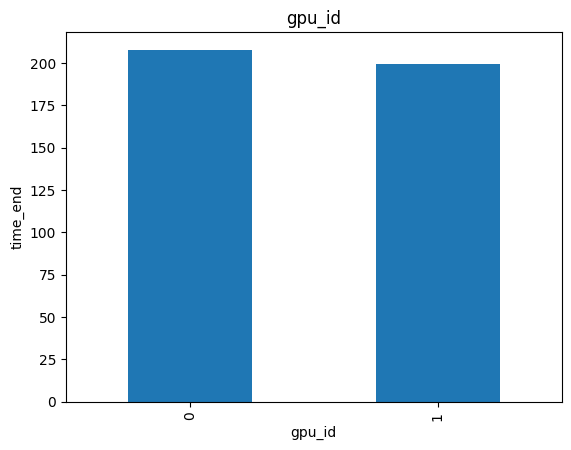

In [20]:
for feature in discrete_feature:
    data = df.copy()
    
    # Drop rows with NaN in the feature or 'time_end'
    data = data.dropna(subset=[feature, 'totalexecutiontime_sec'])
    
    # Group by feature and calculate median
    grouped_data = data.groupby(feature)['totalexecutiontime_sec'].median()
    print(f'Grouped data for {feature}:\n', grouped_data)
    
    # Check if grouped_data is not empty
    if not grouped_data.empty:
        grouped_data.plot.bar()
        plt.xlabel(feature)
        plt.ylabel('time_end')
        plt.title(feature)
        plt.show()
    else:
        print(f"No data to plot for {feature}.")


In [21]:

## There is a relationship between variable number and end time

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 21


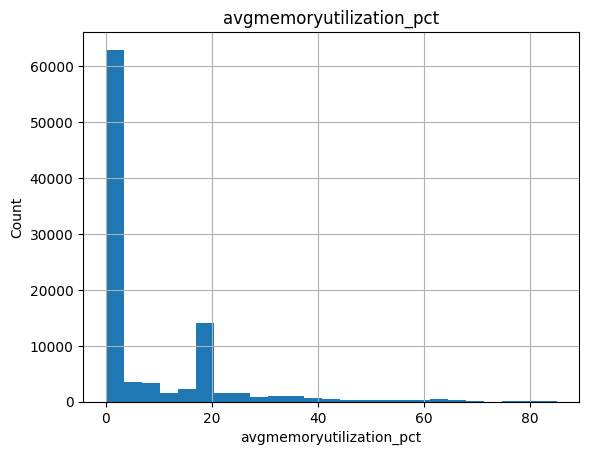

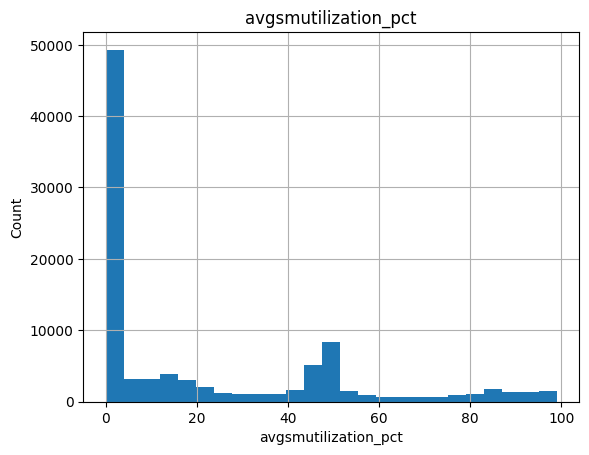

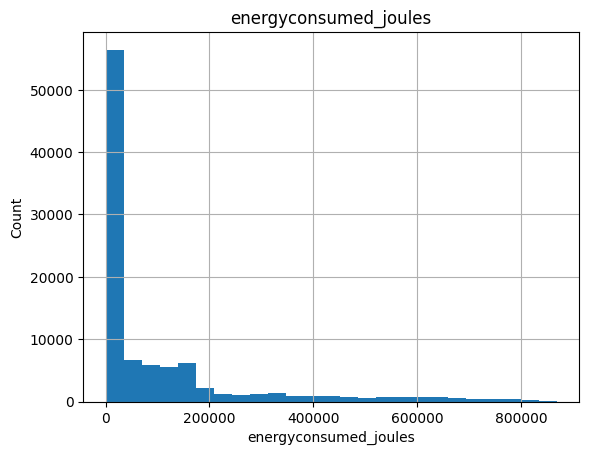

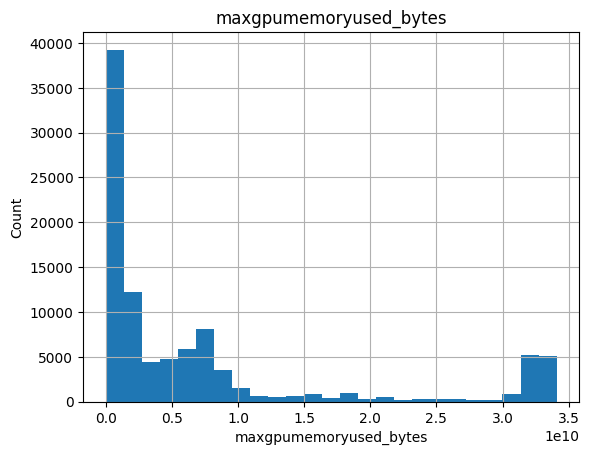

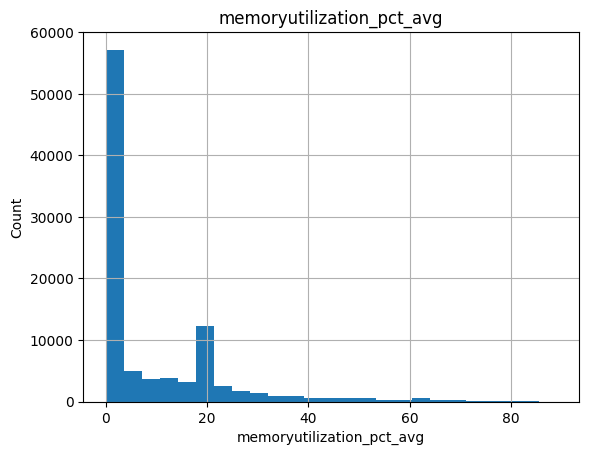

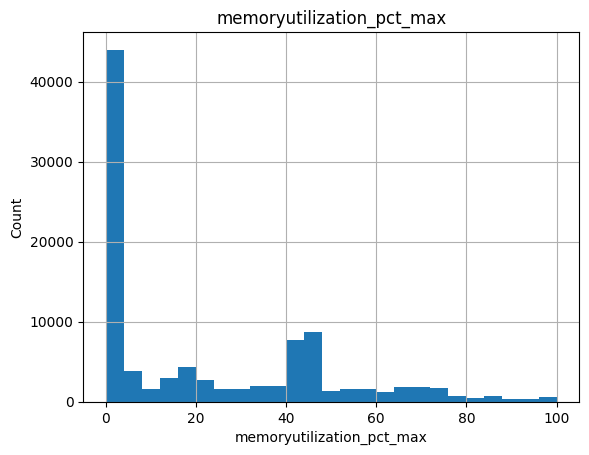

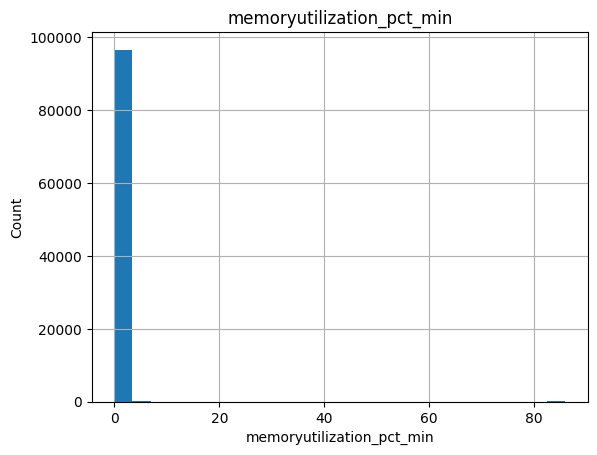

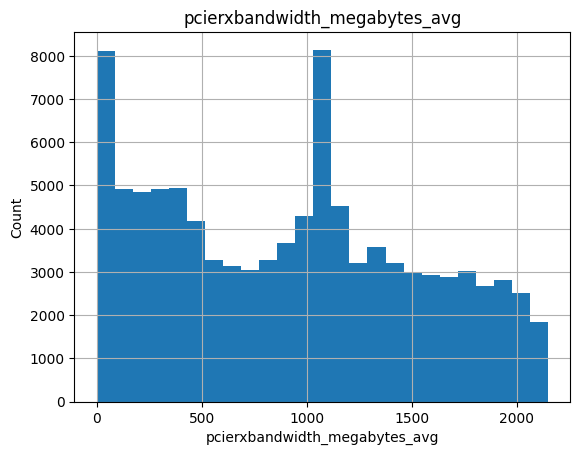

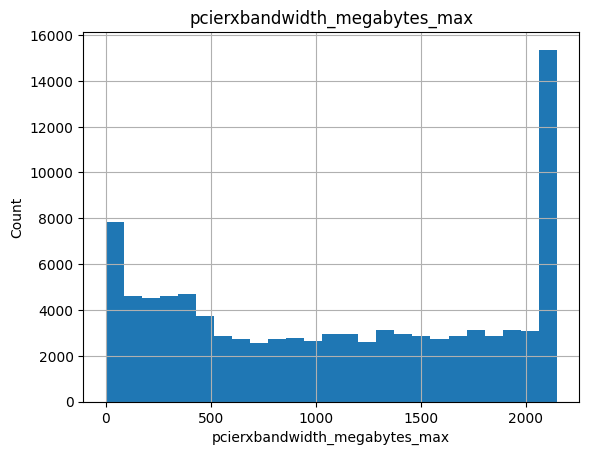

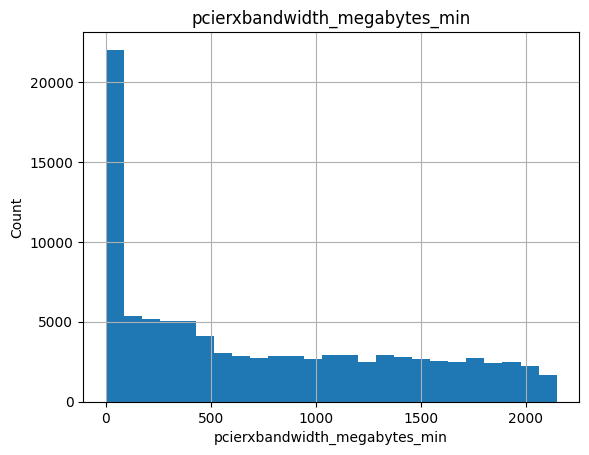

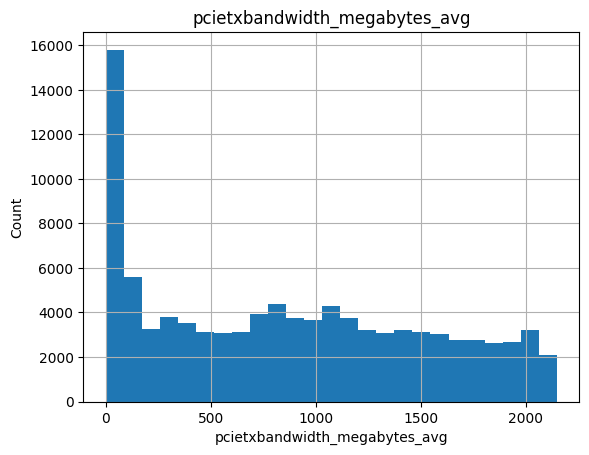

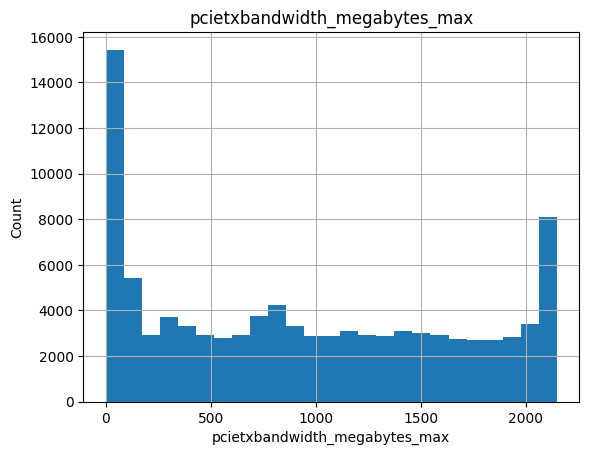

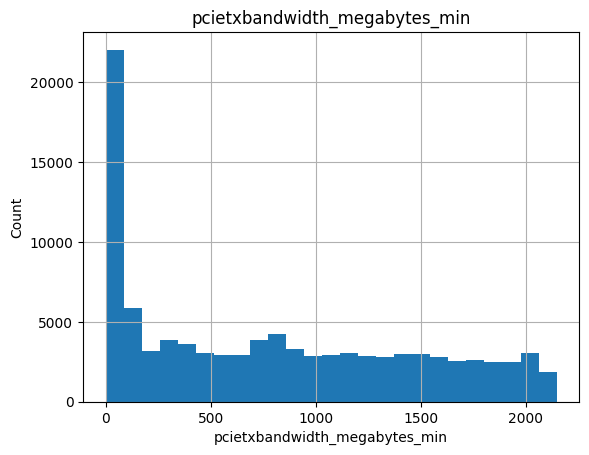

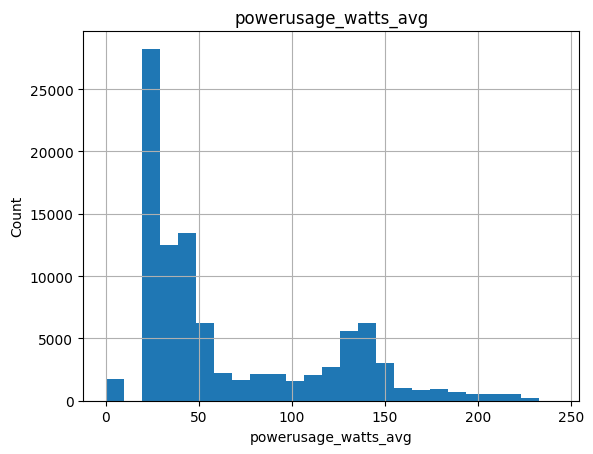

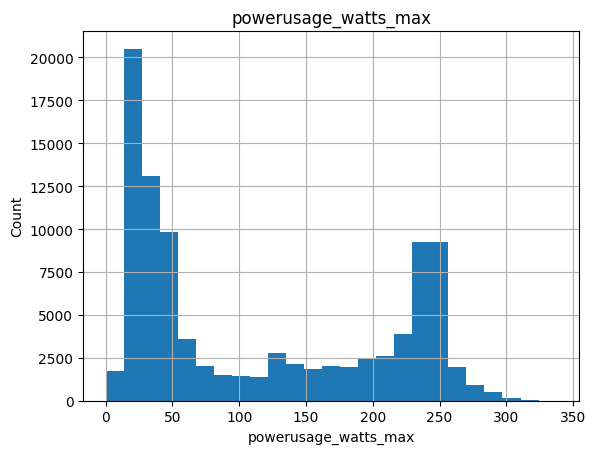

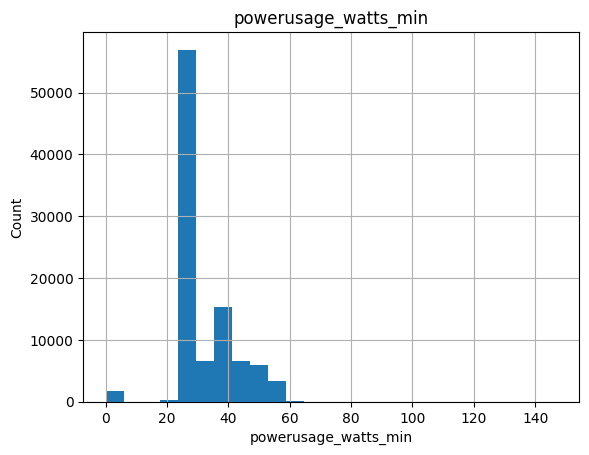

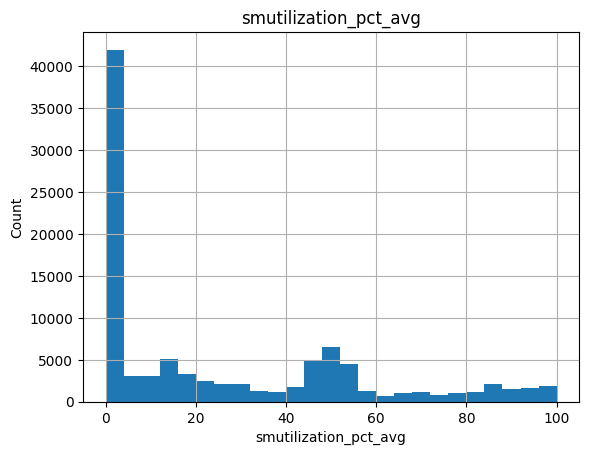

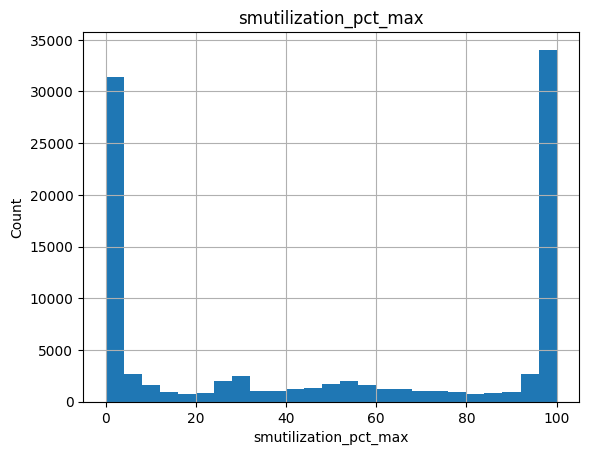

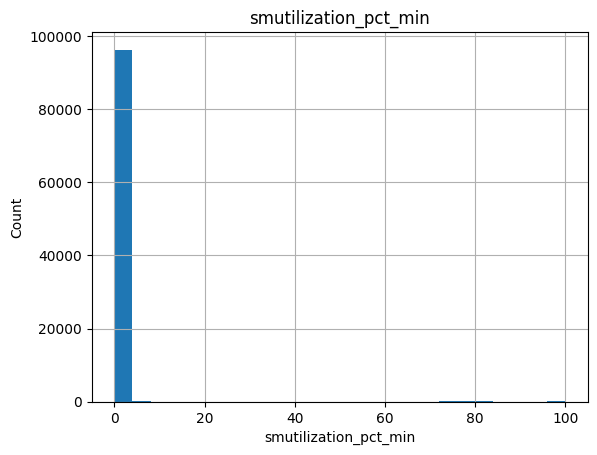

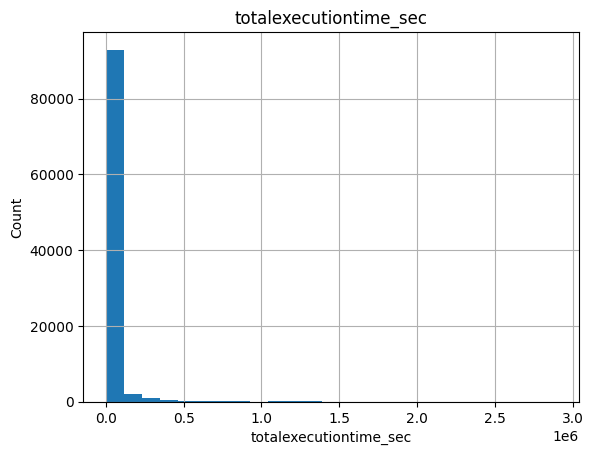

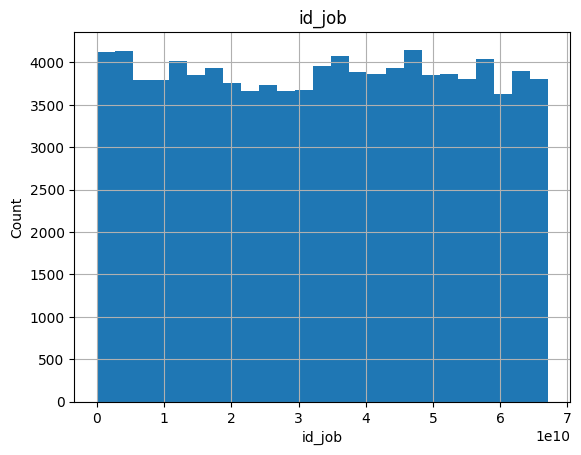

In [22]:

## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

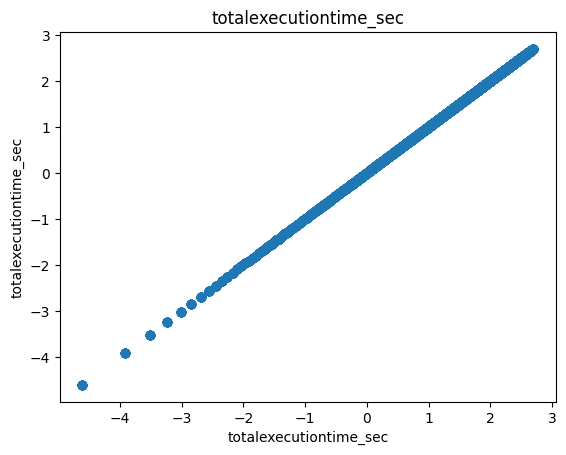

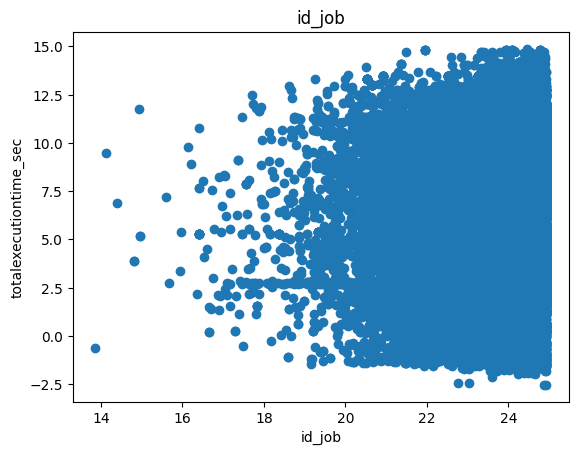

In [23]:
#EDA-2

## We will be using logarithmic transformation


for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique(): #
        pass
    else:
        data[feature]=np.log(data[feature])
        data['totalexecutiontime_sec']=np.log(data['totalexecutiontime_sec'])
        plt.scatter(data[feature],data['totalexecutiontime_sec'])
        plt.xlabel(feature)
        plt.ylabel('totalexecutiontime_sec')
        plt.title(feature)
        plt.show()
        

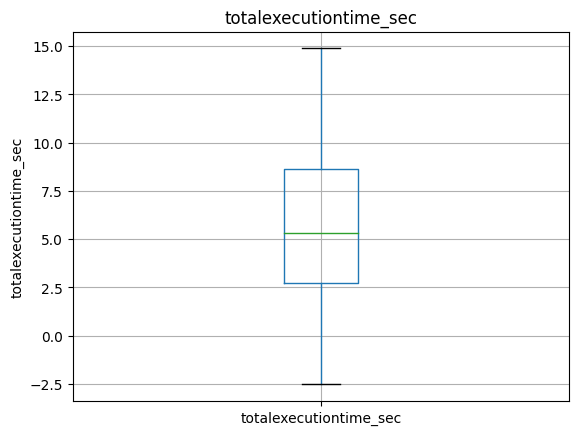

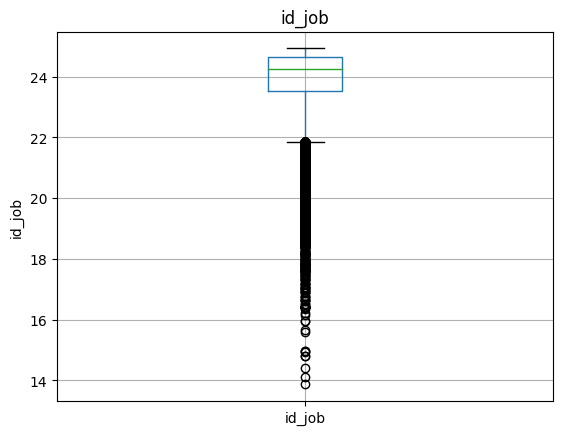

In [24]:
## outliers

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    

In [25]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['Node']

In [26]:
df[categorical_features].head()

,Node
0,r9170217-n750018
1,r44132-n469339
2,r5354770-n172107
3,r1900814-n772143
4,r9515777-n469339


In [27]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Node and number of categories are 225


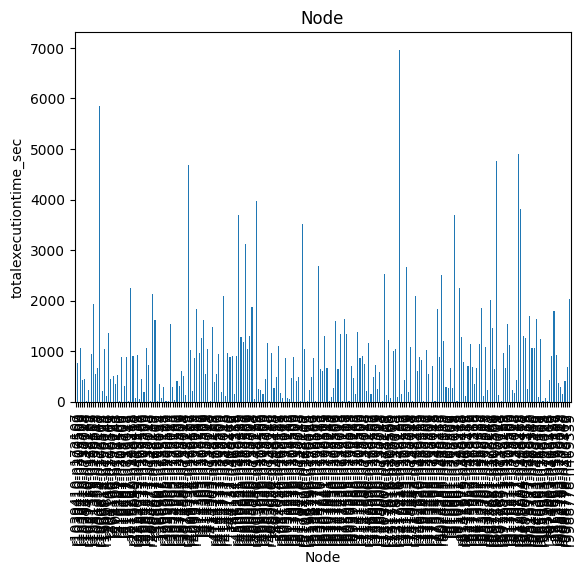

In [28]:
## Find out the relationship between categorical variable and dependent feature end time

for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['totalexecutiontime_sec'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('totalexecutiontime_sec')
    plt.title(feature)
    plt.show()

In [61]:
## FE-1

## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['totalexecutiontime_sec'],test_size=0.1,random_state=0)

In [30]:
X_train.shape, X_test.shape

((87203, 23), (9690, 23))

In [31]:
##MISSING  value

## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

In [32]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

In [33]:
import numpy as np

for feature in numerical_with_nan:
    # Check if the feature is empty
    if df[feature].isnull().all():
        print(f"Warning: {feature} is completely NaN. Filling with a specific value (e.g., 0).")
        df[feature].fillna(0, inplace=True)  # or choose a value that makes sense for your df
    else:
        # Calculate median and create new feature for nan values
        median_value = df[feature].median()
        
        # Create a new feature to capture nan values
        df[feature + 'nan'] = np.where(df[feature].isnull(), 1, 0)
        
        # Replace NaN with the median
        df[feature].fillna(median_value, inplace=True)

# Check if any NaNs remain in the numerical columns
print(df[numerical_with_nan].isnull().sum())


Series([], dtype: float64)


In [34]:
df.head()

,Node,avgmemoryutilization_pct,avgsmutilization_pct,energyconsumed_joules,gpu_id,maxgpumemoryused_bytes,memoryutilization_pct_avg,memoryutilization_pct_max,memoryutilization_pct_min,pcierxbandwidth_megabytes_avg,...,pcietxbandwidth_megabytes_max,pcietxbandwidth_megabytes_min,powerusage_watts_avg,powerusage_watts_max,powerusage_watts_min,smutilization_pct_avg,smutilization_pct_max,smutilization_pct_min,totalexecutiontime_sec,id_job
0,r9170217-n750018,0.0,1.0,157521.0,0,2.645557e+09,3.0,24.0,0.0,1646.0,...,1530.0,676.0,44.0546,156.962,25.468,11.0,64.0,0.0,4452.47,4393785332
1,r44132-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.000,0.000,0.0,0.0,0.0,0.54,18177101425
2,r5354770-n172107,0.0,3.0,94816.0,0,2.917171e+07,0.0,0.0,0.0,1846.0,...,1872.0,1346.0,26.3725,27.483,25.979,6.0,43.0,0.0,8398.30,39529488078
3,r1900814-n772143,0.0,0.0,69451.0,0,1.527587e+09,0.0,1.0,0.0,539.0,...,337.0,293.0,37.5481,52.039,26.676,1.0,25.0,0.0,1851.72,19994333952
4,r9515777-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,1991.0,...,1109.0,1109.0,25.0320,25.032,25.032,0.0,0.0,0.0,0.99,397881706


In [35]:
df.head(100)

,Node,avgmemoryutilization_pct,avgsmutilization_pct,energyconsumed_joules,gpu_id,maxgpumemoryused_bytes,memoryutilization_pct_avg,memoryutilization_pct_max,memoryutilization_pct_min,pcierxbandwidth_megabytes_avg,...,pcietxbandwidth_megabytes_max,pcietxbandwidth_megabytes_min,powerusage_watts_avg,powerusage_watts_max,powerusage_watts_min,smutilization_pct_avg,smutilization_pct_max,smutilization_pct_min,totalexecutiontime_sec,id_job
0,r9170217-n750018,0.0,1.0,157521.0,0,2.645557e+09,3.0,24.0,0.0,1646.0,...,1530.0,676.0,44.0546,156.962,25.468,11.0,64.0,0.0,4452.47,4393785332
1,r44132-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.000,0.000,0.0,0.0,0.0,0.54,18177101425
2,r5354770-n172107,0.0,3.0,94816.0,0,2.917171e+07,0.0,0.0,0.0,1846.0,...,1872.0,1346.0,26.3725,27.483,25.979,6.0,43.0,0.0,8398.30,39529488078
3,r1900814-n772143,0.0,0.0,69451.0,0,1.527587e+09,0.0,1.0,0.0,539.0,...,337.0,293.0,37.5481,52.039,26.676,1.0,25.0,0.0,1851.72,19994333952
4,r9515777-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,1991.0,...,1109.0,1109.0,25.0320,25.032,25.032,0.0,0.0,0.0,0.99,397881706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,r9852763-n172107,0.0,0.0,814.0,1,0.000000e+00,0.0,0.0,0.0,362.0,...,1973.0,1973.0,26.1830,26.325,26.056,0.0,0.0,0.0,32.37,8135610947
96,r368967-n750018,0.0,0.0,0.0,0,0.000000e+00,0.0,0.0,0.0,394.0,...,0.0,0.0,0.0000,0.000,0.000,0.0,0.0,0.0,0.33,22301825574
97,r204106-n200569,0.0,2.0,167350.0,1,1.143996e+09,3.0,5.0,0.0,955.0,...,2147.0,0.0,46.5397,56.021,35.277,65.0,99.0,0.0,71936.80,11493770485
98,r6707841-n200569,0.0,2.0,196242.0,0,1.143996e+09,4.0,5.0,0.0,1156.0,...,2147.0,0.0,54.5255,59.746,38.224,93.0,99.0,0.0,74373.80,66216696884


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96893 entries, 0 to 96892
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Node                           96893 non-null  object 
 1   avgmemoryutilization_pct       96893 non-null  float64
 2   avgsmutilization_pct           96893 non-null  float64
 3   energyconsumed_joules          96893 non-null  float64
 4   gpu_id                         96893 non-null  int64  
 5   maxgpumemoryused_bytes         96893 non-null  float64
 6   memoryutilization_pct_avg      96893 non-null  float64
 7   memoryutilization_pct_max      96893 non-null  float64
 8   memoryutilization_pct_min      96893 non-null  float64
 9   pcierxbandwidth_megabytes_avg  96893 non-null  float64
 10  pcierxbandwidth_megabytes_max  96893 non-null  float64
 11  pcierxbandwidth_megabytes_min  96893 non-null  float64
 12  pcietxbandwidth_megabytes_avg  96893 non-null 

In [37]:
# Handling Rare Categorical Feature
# We will remove categorical variables that are present less than 1% of the observations


categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']


In [38]:

categorical_features

['Node']

In [39]:
##FINAL

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

dataset=pd.read_csv('data/dcgm.csv')

In [40]:
dataset.head()

,Node,avgmemoryutilization_pct,avgsmutilization_pct,energyconsumed_joules,gpu_id,maxgpumemoryused_bytes,memoryutilization_pct_avg,memoryutilization_pct_max,memoryutilization_pct_min,pcierxbandwidth_megabytes_avg,pcierxbandwidth_megabytes_max,pcierxbandwidth_megabytes_min,pcietxbandwidth_megabytes_avg,pcietxbandwidth_megabytes_max,pcietxbandwidth_megabytes_min,powerusage_watts_avg,powerusage_watts_max,powerusage_watts_min,smutilization_pct_avg,smutilization_pct_max,smutilization_pct_min,totalexecutiontime_sec,id_job
0,r9170217-n750018,0.0,1.0,157521.0,0,2.645557e+09,3.0,24.0,0.0,1646.0,1748.0,1613.0,971.0,1530.0,676.0,44.0546,156.962,25.468,11.0,64.0,0.0,4452.47,4393785332
1,r44132-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000,0.0,0.0,0.0,0.54,18177101425
2,r5354770-n172107,0.0,3.0,94816.0,0,2.917171e+07,0.0,0.0,0.0,1846.0,1849.0,1838.0,1785.0,1872.0,1346.0,26.3725,27.483,25.979,6.0,43.0,0.0,8398.30,39529488078
3,r1900814-n772143,0.0,0.0,69451.0,0,1.527587e+09,0.0,1.0,0.0,539.0,542.0,536.0,314.0,337.0,293.0,37.5481,52.039,26.676,1.0,25.0,0.0,1851.72,19994333952
4,r9515777-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,1991.0,1991.0,1991.0,1109.0,1109.0,1109.0,25.0320,25.032,25.032,0.0,0.0,0.0,0.99,397881706


In [51]:
## Capture the dependent feature
Y=dataset[['totalexecutiontime_sec']]

In [52]:
## drop dependent feature from dataset
X=dataset.drop(['totalexecutiontime_sec'],axis=1)

In [53]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [54]:
X.head()

,Node,avgmemoryutilization_pct,avgsmutilization_pct,energyconsumed_joules,gpu_id,maxgpumemoryused_bytes,memoryutilization_pct_avg,memoryutilization_pct_max,memoryutilization_pct_min,pcierxbandwidth_megabytes_avg,pcierxbandwidth_megabytes_max,pcierxbandwidth_megabytes_min,pcietxbandwidth_megabytes_avg,pcietxbandwidth_megabytes_max,pcietxbandwidth_megabytes_min,powerusage_watts_avg,powerusage_watts_max,powerusage_watts_min,smutilization_pct_avg,smutilization_pct_max,smutilization_pct_min,id_job
0,r9170217-n750018,0.0,1.0,157521.0,0,2.645557e+09,3.0,24.0,0.0,1646.0,1748.0,1613.0,971.0,1530.0,676.0,44.0546,156.962,25.468,11.0,64.0,0.0,4393785332
1,r44132-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000,0.0,0.0,0.0,18177101425
2,r5354770-n172107,0.0,3.0,94816.0,0,2.917171e+07,0.0,0.0,0.0,1846.0,1849.0,1838.0,1785.0,1872.0,1346.0,26.3725,27.483,25.979,6.0,43.0,0.0,39529488078
3,r1900814-n772143,0.0,0.0,69451.0,0,1.527587e+09,0.0,1.0,0.0,539.0,542.0,536.0,314.0,337.0,293.0,37.5481,52.039,26.676,1.0,25.0,0.0,19994333952
4,r9515777-n469339,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,1991.0,1991.0,1991.0,1109.0,1109.0,1109.0,25.0320,25.032,25.032,0.0,0.0,0.0,397881706


In [55]:
## Cdependent feature
y.head()

,totalexecutiontime_sec
0,4452.47
1,0.54
2,8398.30
3,1851.72
4,0.99


In [56]:
X = preprocessor.fit_transform(X_train)

In [57]:
X.shape

(96893, 246)

In [58]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((77514, 246), (19379, 246))

In [63]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [64]:

categorical_features

['Node']

In [65]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['totalexecutiontime_sec'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [66]:
dataset.head(10)

,Node,avgmemoryutilization_pct,avgsmutilization_pct,energyconsumed_joules,gpu_id,maxgpumemoryused_bytes,memoryutilization_pct_avg,memoryutilization_pct_max,memoryutilization_pct_min,pcierxbandwidth_megabytes_avg,pcierxbandwidth_megabytes_max,pcierxbandwidth_megabytes_min,pcietxbandwidth_megabytes_avg,pcietxbandwidth_megabytes_max,pcietxbandwidth_megabytes_min,powerusage_watts_avg,powerusage_watts_max,powerusage_watts_min,smutilization_pct_avg,smutilization_pct_max,smutilization_pct_min,totalexecutiontime_sec,id_job
0,Rare_var,0.0,1.0,157521.0,0,2.645557e+09,3.0,24.0,0.0,1646.0,1748.0,1613.0,971.0,1530.0,676.0,44.0546,156.962,25.468,11.0,64.0,0.0,4452.47,4393785332
1,Rare_var,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000,0.0,0.0,0.0,0.54,18177101425
2,Rare_var,0.0,3.0,94816.0,0,2.917171e+07,0.0,0.0,0.0,1846.0,1849.0,1838.0,1785.0,1872.0,1346.0,26.3725,27.483,25.979,6.0,43.0,0.0,8398.30,39529488078
3,Rare_var,0.0,0.0,69451.0,0,1.527587e+09,0.0,1.0,0.0,539.0,542.0,536.0,314.0,337.0,293.0,37.5481,52.039,26.676,1.0,25.0,0.0,1851.72,19994333952
4,Rare_var,0.0,0.0,0.0,1,0.000000e+00,0.0,0.0,0.0,1991.0,1991.0,1991.0,1109.0,1109.0,1109.0,25.0320,25.032,25.032,0.0,0.0,0.0,0.99,397881706
5,Rare_var,0.0,0.0,22587.0,0,0.000000e+00,0.0,0.0,0.0,1740.0,1740.0,1739.0,1722.0,1722.0,1721.0,27.6220,27.821,27.532,0.0,0.0,0.0,819.64,56459319806
6,Rare_var,0.0,3.0,196461.0,1,1.143996e+09,4.0,5.0,0.0,955.0,1683.0,206.0,1087.0,2147.0,0.0,54.6094,61.091,38.101,88.0,97.0,0.0,74636.60,13878440310
7,Rare_var,0.0,2.0,46532.0,1,2.645557e+09,1.0,14.0,0.0,199.0,205.0,191.0,1674.0,1701.0,1649.0,38.6441,126.934,24.203,3.0,39.0,0.0,1200.81,32478933276
8,Rare_var,0.0,0.0,6706.0,0,1.253048e+09,0.0,0.0,0.0,2130.0,2131.0,2129.0,1991.0,2015.0,1968.0,26.1606,36.257,25.420,4.0,9.0,0.0,257.37,31130163482
9,Rare_var,0.0,0.0,90161.0,0,6.889472e+06,0.0,0.0,0.0,1695.0,1697.0,1693.0,1361.0,1362.0,1359.0,25.0819,25.412,24.761,0.0,0.0,0.0,34740.80,14306435439


In [ ]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['totalexecutiontime_sec'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [59]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [62]:
models = {
    "Linear Regression": LinearRegression(),
    # "Lasso": Lasso(),
     #"Ridge": Ridge(),
     #"K-Neighbors Regressor": KNeighborsRegressor(),
     #"Decision Tree": DecisionTreeRegressor(),
     #"Random Forest Regressor": RandomForestRegressor(),
     #"XGBRegressor": XGBRegressor(), 
     #"CatBoosting Regressor": CatBoostRegressor(verbose=False),
     #"AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

ValueError: could not convert string to float: 'r9659953-n172107'